In [1]:
import seaborn as sns
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

data = pandas.read_csv('data.csv')
academia = np.sort(np.array(list(data[data['class'] == 0]['3years'])))
industry = np.sort(np.array(list(data[data['class'] == 1]['3years'])))
hybrid = np.sort(np.array(list(data[data['class'] == 2]['3years'])))

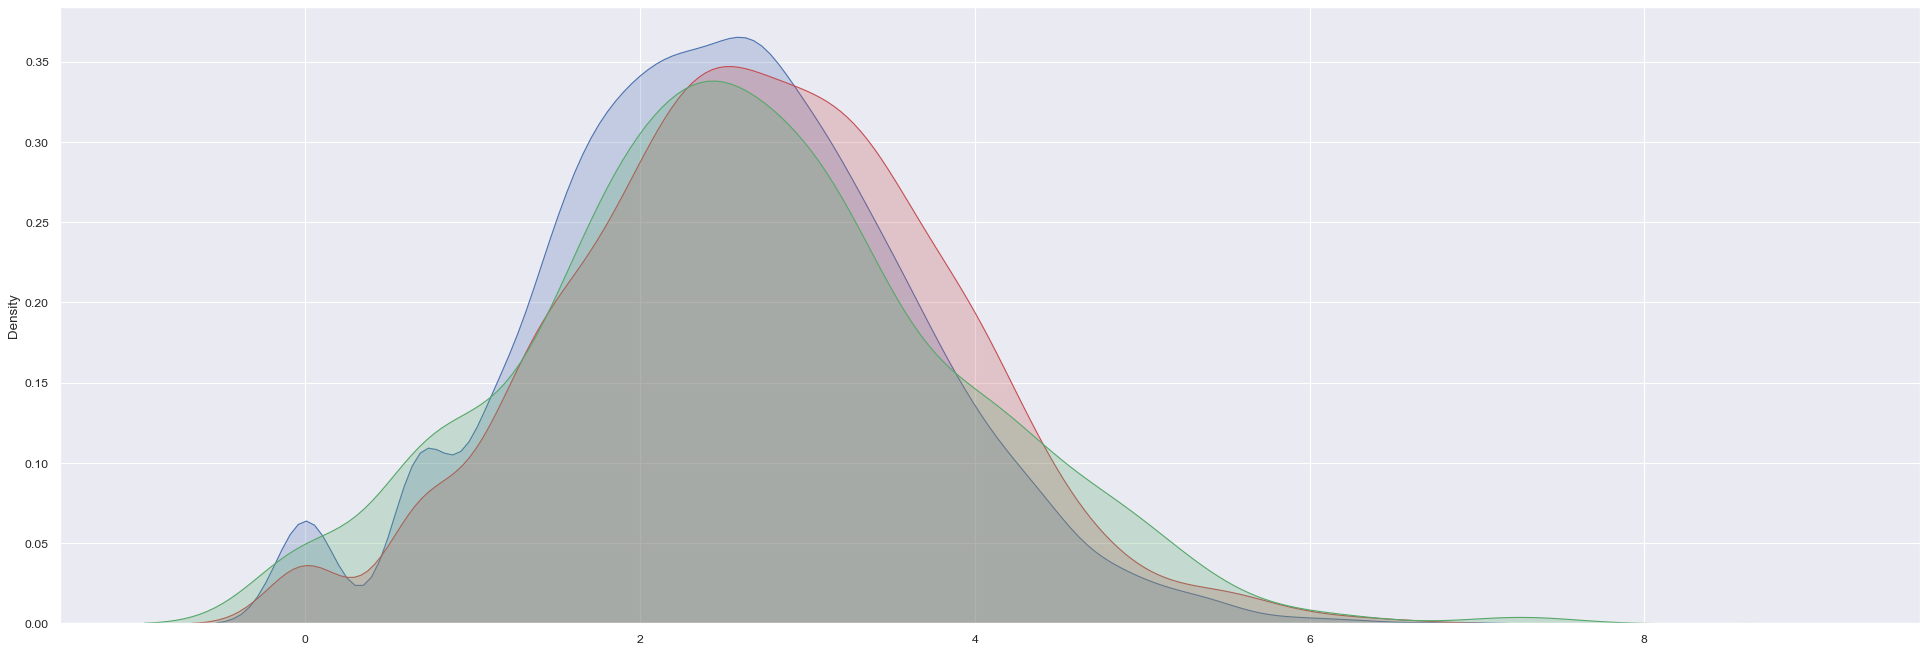

In [2]:
sns.set(style="darkgrid")

figure(figsize=(30, 10), dpi=80)
# plotting both distibutions on the same figure
fig = sns.kdeplot(np.log(academia+1), fill=True, color="b", label = 'academia')
fig = sns.kdeplot(np.log(hybrid+1), fill=True, color="r", label = 'hybrid')
fig = sns.kdeplot(np.log(industry+1), fill=True, color="g", label = 'industry')
plt.show()

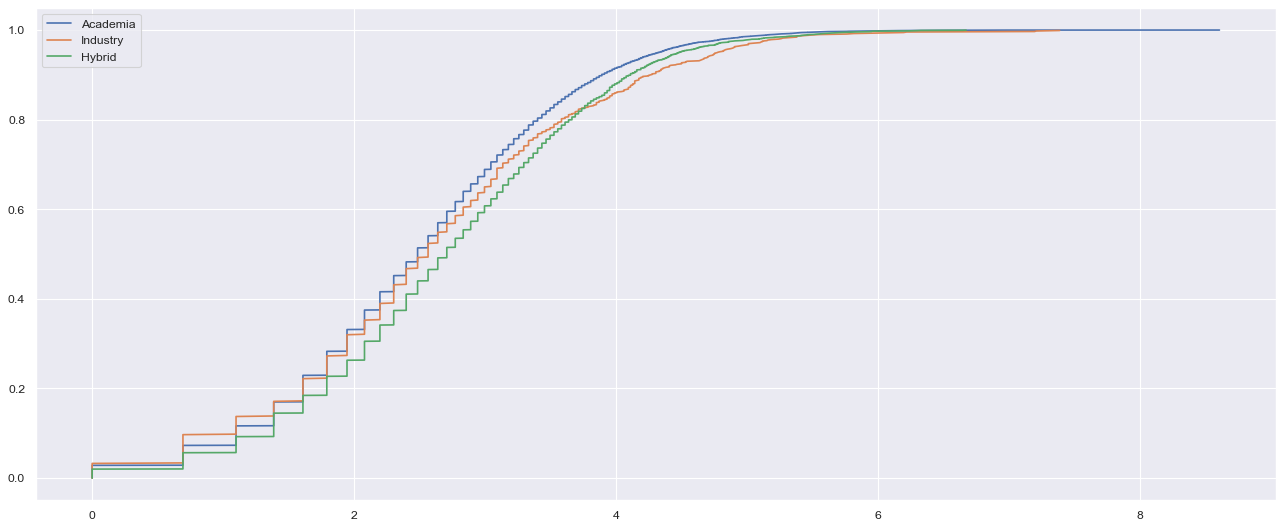

In [3]:
figure(figsize=(20, 8), dpi=80)
l = academia
x = np.log(l+1)
y = np.arange(len(l+1))/len(l+1)
plt.plot(x, y,linestyle = 'solid', label="Academia")

l = industry
x = np.log(l+1)
y = np.arange(len(l+1))/len(l+1)
plt.plot(x, y,linestyle = 'solid', label="Industry")

l = hybrid
x = np.log(l+1)
y = np.arange(len(l+1))/len(l+1)
plt.plot(x, y,linestyle = 'solid', label="Hybrid")

plt.legend(loc="upper left")
plt.show()

In [4]:
def computePercentage(threshold, academia, industry, hybrid):
    print('Threshold:', threshold)
    N_academia = len(academia)
    N_industy = len(industry)
    N_hybrid = len(hybrid)
    
    N_part_academia = len(academia[academia >= threshold])
    N_part_industry = len(industry[industry >= threshold])
    N_part_hybrid = len(hybrid[hybrid >= threshold])
    
    print("Academia: ", 100*N_part_academia/N_academia)
    print("Industry: ", 100*N_part_industry/N_industy)
    print("Hybrid: ", 100*N_part_hybrid/N_hybrid)
    print('\n')

In [5]:
computePercentage(1,academia, industry, hybrid)
computePercentage(3,academia, industry, hybrid)
computePercentage(5,academia, industry, hybrid)
computePercentage(10,academia, industry, hybrid)
computePercentage(50,academia, industry, hybrid)
computePercentage(100,academia, industry, hybrid)
computePercentage(200,academia, industry, hybrid)
computePercentage(500,academia, industry, hybrid)
computePercentage(1000,academia, industry, hybrid)
computePercentage(2000,academia, industry, hybrid)

Threshold: 1
Academia:  97.15623954499833
Industry:  96.62162162162163
Hybrid:  97.96954314720813


Threshold: 3
Academia:  88.3461581353853
Industry:  86.14864864864865
Hybrid:  90.72758037225043


Threshold: 5
Academia:  77.07148433143749
Industry:  77.70270270270271
Hybrid:  81.5228426395939


Threshold: 10
Academia:  54.812088769934206
Industry:  56.75675675675676
Hybrid:  62.57191201353638


Threshold: 50
Academia:  9.601873536299765
Industry:  15.427927927927929
Hybrid:  14.01015228426396


Threshold: 100
Academia:  2.8660644585703134
Industry:  6.86936936936937
Hybrid:  4.128595600676819


Threshold: 200
Academia:  0.8140961302553809
Industry:  1.6891891891891893
Hybrid:  1.4890016920473774


Threshold: 500
Academia:  0.12267201962752314
Industry:  0.45045045045045046
Hybrid:  0.20304568527918782


Threshold: 1000
Academia:  0.03345600535296086
Industry:  0.33783783783783783
Hybrid:  0.0


Threshold: 2000
Academia:  0.011152001784320286
Industry:  0.0
Hybrid:  0.0




In [6]:
year = 2012
count_year_academia = []
count_year_industry = []
count_year_hybrid = []
years = []
while year < 2021:
    years.append(year)
    count_year_academia.append(len(data[(data['class']==0) & (data['date']==year)]))
    count_year_industry.append(len(data[(data['class']==1) & (data['date']==year)]))
    count_year_hybrid.append(len(data[(data['class']==2) & (data['date']==year)]))
    year += 1

In [7]:
print(count_year_academia)
print(count_year_industry)
print(count_year_hybrid)
print(years)

[490, 588, 480, 690, 679, 580, 1543, 2005, 1912]
[43, 49, 32, 47, 37, 33, 169, 224, 254]
[125, 140, 123, 189, 174, 174, 505, 795, 730]
[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [8]:
# total growing
def cumulativeCount(l, years):
    i = 0
    cu = 0
    ll = []
    for year in years:
        cu += l[i]
        ll.append(cu)
        i += 1
    return ll

def growthRate(l, years):
    i = 1
    ll = []
    for year in years:
        ll.append(l[i]/l[i-1])
        i += 1
    return ll

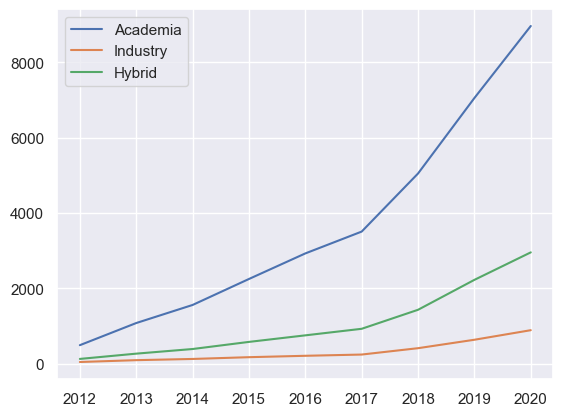

In [9]:
y = cumulativeCount(count_year_academia, years)
x = years
plt.plot(x, y,linestyle = 'solid', label = 'Academia')
y = cumulativeCount(count_year_industry, years)
x = years
plt.plot(x, y,linestyle = 'solid', label = 'Industry')
y = cumulativeCount(count_year_hybrid, years)
x = years
plt.plot(x, y,linestyle = 'solid', label = 'Hybrid')
plt.legend(loc="upper left")
plt.show()

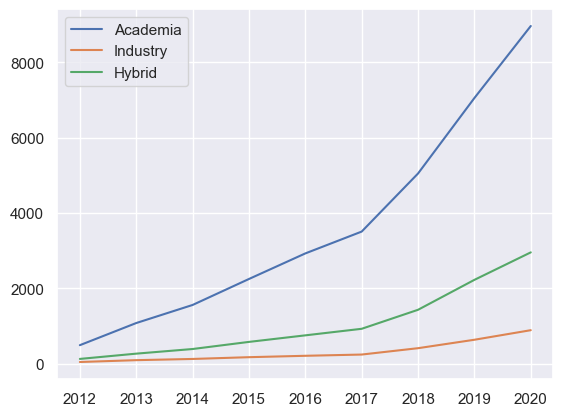

In [10]:
y = cumulativeCount(count_year_academia, years)
x = years
plt.plot(x, y,linestyle = 'solid', label = 'Academia')
y = cumulativeCount(count_year_industry, years)
x = years
plt.plot(x, y,linestyle = 'solid', label = 'Industry')
y = cumulativeCount(count_year_hybrid, years)
x = years
plt.plot(x, y,linestyle = 'solid', label = 'Hybrid')
plt.legend(loc="upper left")
plt.show()

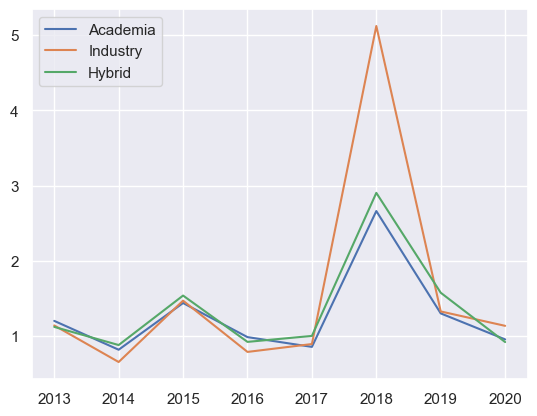

In [11]:
y = growthRate(count_year_academia, years[1:])
x = years[1:]
plt.plot(x, y,linestyle = 'solid', label = 'Academia')
y = growthRate(count_year_industry, years[1:])
x = years[1:]
plt.plot(x, y,linestyle = 'solid', label = 'Industry')
y = growthRate(count_year_hybrid, years[1:])
x = years[1:]
plt.plot(x, y,linestyle = 'solid', label = 'Hybrid')
plt.legend(loc="upper left")
plt.show()